## ML. Regression

### House price prediction

Today we will follow a classic problem used to study regression:

> *I want to put my house up for sale, but I don't know at what price. Therefore, I checked the parameters and prices of houses in my area and collected them in a table. Based on this, I want to prepare a linear regression model and estimate the price of my house. How to do it?*

The key point is that the same methods can be used for many other problems, including the analysis of physiological data. You just need to have a continuous variable that you want to predict (e.g., valence and arousal of emotions over the range $[1,9]$ in the BIRAFFE2 set, as we have seen in Stats 101 class).

In [ ]:
# necessary imports
import numpy as np
import pandas as pd

# import matplotlib library
import matplotlib.pyplot as plt
# if you work locally (not at Google Colab) you can activate interactive plots by changing "inline" to "notebook"
%matplotlib inline

# import bokeh
import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()

# for machine learning
import sklearn
from sklearn import linear_model, metrics, model_selection

In [ ]:
# Download the dataset (to Virtual Machine local filesystem)
!wget https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_train.csv
!wget https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_test.csv

--2022-04-05 12:43:07--  https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_train.csv
Resolving krzysztof.kutt.pl (krzysztof.kutt.pl)... 185.255.40.28
Connecting to krzysztof.kutt.pl (krzysztof.kutt.pl)|185.255.40.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010102 (1.9M) [text/csv]
Saving to: ‘kc_house_data_train.csv’

kc_house_data_train 100%[===================>]   1.92M  2.68MB/s    in 0.7s    

2022-04-05 12:43:09 (2.68 MB/s) - ‘kc_house_data_train.csv’ saved [2010102/2010102]

--2022-04-05 12:43:09--  https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_test.csv
Resolving krzysztof.kutt.pl (krzysztof.kutt.pl)... 185.255.40.28
Connecting to krzysztof.kutt.pl (krzysztof.kutt.pl)|185.255.40.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502130 (490K) [text/csv]
Saving to: ‘kc_house_data_test.csv’

kc_house_data_test. 100%[===================>] 490.36K  1.01MB/s    in 0.5s    

2022-04-05 12:43:10 (1.01 MB/s) - ‘kc_

**Task 1:** The dataset has already been split into two parts (both were downloaded in the previous cell). We will use the training part (`kc_house_data_train.csv`) to prepare the model. At first, we want to load the dataset and view it. To do this:
1. Load the dataset into `pd.DataFrame()` and save as the `houses` variable.
1. Take a look at the first few lines and explore the statistics to get an initial idea of the contents of the set (`head()` and `describe()` may be useful).
1. Prepare two scatterplots:
   * `sqft_living` x `price`
   * `bathrooms` x `price`

               id             date     price  bedrooms  bathrooms  \
0      8077200360  20141112T000000  557865.0         4       2.50   
1       629650030  20150312T000000  317500.0         4       2.50   
2      9406510040  20150206T000000  555000.0         4       2.50   
3      7224000545  20140825T000000  370000.0         4       3.00   
4      9828702895  20141022T000000  700000.0         4       1.75   
...           ...              ...       ...       ...        ...   
17285  1775801340  20140606T000000  415000.0         3       1.75   
17286  3741600020  20140915T000000  540000.0         3       2.25   
17287  8934100125  20140829T000000  810000.0         3       2.00   
17288  5104520550  20140701T000000  357500.0         3       3.50   
17289  6824100007  20150326T000000  427005.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             3030      6813     2.0           0     0  ...      9   
1             2233      6025   

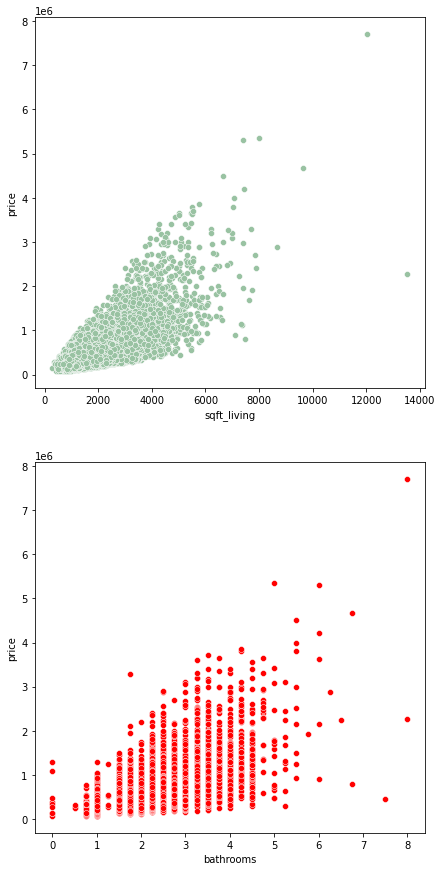

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 


df = pd.read_csv ('kc_house_data_train.csv')

houses = df
print(houses)


houses.describe(include='all')



houses_dane = pd.DataFrame(houses,columns=['sqft_living','bathrooms','price'])
houses_dane = houses_dane.dropna()


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(7,15))



sns.scatterplot(x=houses_dane['sqft_living'], y=houses_dane['price'], ax=ax[0],color='#99c2a2')
sns.scatterplot(x=houses_dane['bathrooms'], y=houses_dane['price'], ax=ax[1], color='red')


### Scikit-learn

We will use the popular [scikit-learn](https://scikit-learn.org/) library to develop machine learning models.
A brief summary of the library can be found [here](https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/).
For those who want to get to know the library better, I suggest starting at the [official site](https://scikit-learn.org/), where you will find detailed documentation that also includes a number of tutorials.

Of course, this is not the only library for machine learning. Very trendy libraries at the moment are [Tensorflow](https://www.tensorflow.org/) and [Keras](https://keras.io/), but we don't have enough time to explore them in this class :)

### Simple regression model

**Task 2**: Let's start by preparing some simple regression models in which we predict the price based on one parameter of the house.
1. To begin, split the set of houses in proportions: 67% for the learning set and 33% for the test set using the [`model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.
1. The code to fit the model to the data has already been prepared below. Run it for two different variables (`bathrooms` and `sqft_living`) (if you want to know more about LinearRegression, check the docs: [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). As a result, you will get 2 linear regression models.
1. For both, use the [`linear_model.LinearRegression.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) function on the `houses_test` set to determine the prices estimated by the model.
1. Finally, use the [`metrics.mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function to calculate the prediction error on the test set for each model.
1. Compare the achieved performance.

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 
#houses_train, houses_test = model_selection.train_test_split(houses['sqft_living'])

houses_train, houses_test = model_selection.train_test_split(houses_dane,test_size=0.33, train_size=0.67)







[3.27203534e+11]


[3.54183024e+11]


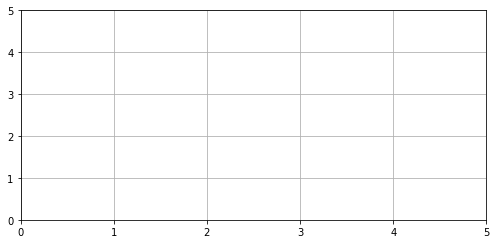

In [ ]:
regr_model = linear_model.LinearRegression()

# fit the model to the data (x = bathrooms, y = price)
regr_model.fit(houses_train['bathrooms'].values.reshape(-1,1), houses_train['price'])


oszacowanie1=regr_model.predict(houses_test['bathrooms'].values.reshape(-1,1))



blad_sr_kwadratowy1=metrics.mean_squared_error(houses_test['bathrooms'], oszacowanie1, multioutput='raw_values')

print(blad_sr_kwadratowy1)

# get the parameters for the regression: y = t1 * x + t0
theta_1 = regr_model.coef_[0]
theta_0 = regr_model.intercept_

# visualize the results - data points
bf = bokeh.plotting.figure(plot_width=1000, plot_height=400,
                           title="Model for: bathrooms")
bf.scatter(houses_train['bathrooms'], houses_train['price'])

# visualize the results - regression
x = np.linspace(0, max(houses_train['bathrooms']), 100)
y = theta_1 * x + theta_0
bf.line(x, y, legend_label="Regression", color='green')






# show the final plot
bokeh.plotting.show(bf)



# fit the model to the data (x = sqft_living, y = price)

regr_model.fit(houses_train['sqft_living'].values.reshape(-1,1), houses_train['price'])

oszacowanie2=regr_model.predict(houses_test['sqft_living'].values.reshape(-1,1))

blad_sr_kwadratowy2=metrics.mean_squared_error(houses_test['sqft_living'], oszacowanie2, multioutput='raw_values')

print(blad_sr_kwadratowy2)

# get the parameters for the regression: y = t1 * x + t0
theta_1 = regr_model.coef_[0]
theta_0 = regr_model.intercept_

# visualize the results - data points
bf = bokeh.plotting.figure(plot_width=1000, plot_height=400,
                           title="Model for: sqft_living")

bf.scatter(houses_train['sqft_living'], houses_train['price'])

# visualize the results - regression
x = np.linspace(0, max(houses_train['sqft_living']), 100)
y = theta_1 * x + theta_0
bf.line(x, y, legend_label="Regression", color='red')

# show the final plot
bokeh.plotting.show(bf)






plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()
plt.plot(blad_sr_kwadratowy1, blad_sr_kwadratowy2, marker="o", markersize=20, markeredgecolor="red",
markerfacecolor="green")
plt.show()









In [ ]:
# _FILL_IN_YOUR_CODE_HERE 

### Multiple regression

Note that the models we have created so far are very inaccurate.
Even the graph shows that the model is a straight line, while some relationships are rather polynomial (e.g., `price` by `bedrooms`).
The introduction of more dimensions may allow for more accurate prediction.

**Task 3**: Prepare **one** model using two variables (`sqft_living` and `bedrooms`) as predictors (`X` matrix in [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)).

Is this model better than the previous one?

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 

[567126.8387681  405644.9023311  292512.79783945 ... 318199.84880414
 599991.71996996 473512.04499864]


'\nprint(\'Intercept: \n\', regr.intercept_)\nprint(\'Coefficients: \n\', regr.coef_)\n\n# get the parameters for the regression: y = t1 * x + t0\ntheta_1 = regr_model.coef_[0]\ntheta_0 = regr_model.intercept_\n\n# visualize the results - data points\nbf = bokeh.plotting.figure(plot_width=1000, plot_height=400,\n                           title="Model for: sqft_living, bedrooms")\n\nbf.scatter(houses_train[[\'sqft_living\', \'bedrooms\']], houses_train[\'price\'])\n\n# visualize the results - regression\nx = np.linspace(0, max(houses_train[\'sqft_living\']), 100)\ny = theta_1 * x + theta_0\nbf.line(x, y, legend_label="Regression", color=\'red\')\n\n# show the final plot\nbokeh.plotting.show(bf)\n'

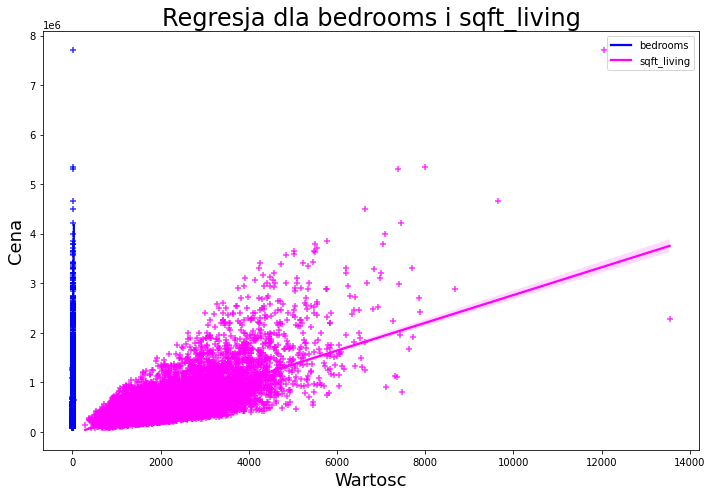

In [ ]:



houses_dane = pd.DataFrame(houses,columns=['sqft_living','bedrooms','price'])
houses_dane = houses_dane.dropna()


houses_train, houses_test = model_selection.train_test_split(houses_dane,test_size=0.33, train_size=0.67)

X = houses_train[['bedrooms', 'sqft_living']]
y = houses_train['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)


predicted = regr.predict(X)

print(predicted)


# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=houses_dane['bedrooms'], y=houses_dane['price'], color='blue', marker='+')
sns.regplot(x=houses_dane['sqft_living'], y=houses_dane['price'], color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['bedrooms', 'sqft_living'])
plt.title('Regresja dla bedrooms i sqft_living', size=24)
plt.xlabel('Wartosc', size=18)
plt.ylabel('Cena', size=18);
'''
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# get the parameters for the regression: y = t1 * x + t0
theta_1 = regr_model.coef_[0]
theta_0 = regr_model.intercept_

# visualize the results - data points
bf = bokeh.plotting.figure(plot_width=1000, plot_height=400,
                           title="Model for: sqft_living, bedrooms")

bf.scatter(houses_train[['sqft_living', 'bedrooms']], houses_train['price'])

# visualize the results - regression
x = np.linspace(0, max(houses_train['sqft_living']), 100)
y = theta_1 * x + theta_0
bf.line(x, y, legend_label="Regression", color='red')

# show the final plot
bokeh.plotting.show(bf)
'''


**Task 4**: Use **all** the (numerical) features available in the dataset (except the `price`). Compare this model with models from previous tasks. Is it better?
Remember, we always test the model on a test set (`houses_test`).

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 

## Advanced Regression

*This part of the notebook presents more advanced topics and is optional.*

### Artificial features

Sometimes it may not be necessary to add more features at all.
It is possible to create your own features based on existing ones!
Most often these are polynomial features.
E.g., `sqft_living` can be pluralized by adding successively `sqft_living^2`, `sqft_living^3`, `sqft_living^4`, ...

**Task 5**: Write a function with the following signature that generates artificial polynomial features:

``` python
def poly_features(dataframe, feature, degree):
  """
  @param dataframe: pd.DataFrame with dataset
  @param feature: string with feature name for polynomials generation.
                  It should correspond to one of the columns in the dataframe
  @param degree: maximal polynolmial degree to generate,
                 e.g., degree=3 will add 2 columns to the dataframe:
                 feature_2 (feature^2), feature_3 (feature^3)
  @return datafame with additional columns
  """
  
```

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 


# tu masz dane wielomianowe 
# https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

from sklearn.preprocessing import PolynomialFeatures


def poly_features(dataframe, feature, degree):
  trans = PolynomialFeatures(degree)
  data = trans.fit_transform(dataframe)

# repo
#https://github.com/devz-codes/Polynomial-Regression-Python/blob/main/Polynomial%20Regression.py


from numpy.linalg import inv
from statistics import mean

class Polynomial_Regression:

    def __init__(self,x_val,y_val,degree):
        self.x_val=x_val
        self.y_val=y_val
        self.degree=degree

    def coefficients(self):

        np.set_printoptions(suppress=True)

        mt1=np.empty((0,0))
        mt2=np.empty((0,0))

        for i in range(1,self.degree+2):
            lst1=[pow(k,i-1) for k in self.x_val]
            prod=list(map(lambda x,y:x*y,lst1,self.y_val))
            mt1=np.append(mt1,np.matrix(sum(prod)))

            a=[]

            for j in range(0,self.degree+1):
                lst2=[pow(k,i+j-1) for k in self.x_val]
                a.append(sum(lst2))
            
            mt2=np.append(mt2,np.matrix([a]))
        
        mt2=mt2.reshape(self.degree+1,self.degree+1)
        mt1=mt1.reshape(self.degree+1,1)
        
        mt2=mt2.astype(np.float64)
        mt1=mt1.astype(np.float64)
        
        mt2=inv(mt2)
        coef=np.dot(mt2,mt1)

        return coef
    
    
    def predict(self,inp):
        i=0
        sum=0
        for x in Polynomial_Regression.coefficients(self):
            sum+=x[0]*pow(inp,i)
            i+=1
        return sum
    
    
    def r_square(self):

        mean_y=mean(self.y_val)
        sst=0
        sse=0

        for i in range(len(self.x_val)):
            sst+=pow(self.y_val[i]-mean_y,2)
            sse+=pow(self.y_val[i]-Polynomial_Regression.predict(self,self.x_val[i]),2)
        
        return (sst-sse)/sst







Polynomial_Regression()




















**Task 6**: Use the written function to create a model based solely on `sqft_living` and its powers.
1. Visualize the model (despite the high degree of the polynomial it is still 2D).
1. Store the results (`mean_quared_error`) for different powers in a list.
1. Visualize the relationship of `mean_squared_error` with the number of polynomial features.
1. Do more features always lead to improved model performance?
  

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 

**Task 7**: Choose the best model from the existing ones and test it on a test set (`kc_house_data_test.csv`, not used yet).
* Even if the results are poor, do not change the parameters of the model to improve the result. Why is this important?

In [ ]:
testset = pd.read_csv("kc_house_data_test.csv")

# _FILL_IN_YOUR_CODE_HERE 

### Beyond "standard" linear regression

1. In classical linear regression, the coefficients can have large values + there is a risk of overfitting. To prevent this, improved models have been developed.  
They can be developed with [`linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) function.
   * *Ridge Regression* (L2 regularization)
   * *Lasso Regression* (L1 regularization)
   * *Elastic Net* (a hybrid combining both approaches)
2. A global model (one for the entire space) is not always best - sometimes it is better to build a local model. That approach is exemplified by the *k-Nearest Neighbour* regression.
3. Remember:
   * The model only takes into account features that are in the dataset, and the dependent variable may be affected by something we did not measure.
   * Algorithms are sensitive to correlations between features - if there is a group of highly correlated features, algorithms tend to choose arbitrarily - and other correlated features may be affected (e.g., removed from the model as not important)! It is worth checking correlations between features before interpretation!

